# **Group 5 **

In [ ]:
#Lana 
#Rabiul 
#Dee 
#Nafeeur 
#Hristina 
#Rachel
#Petvy 
#Taohid

## Project objective
We have to find out, which patient tend to have re-admit based on the dataset. We will use kNN and Decision Tree method for this project.   

# **IMPORT LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split #estimate performance of machine learning model 
from sklearn.linear_model import LogisticRegression #analyze data set to predict outcome 
from sklearn.metrics import accuracy_score

In [2]:
#load the diabetic data set without missing values
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv',na_values=['?'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **DATA EXPLORATION**
This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set.

In [3]:
len(df)

101766

In [4]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
#an overview of the dataset
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.index

RangeIndex(start=0, stop=101766, step=1)

In [8]:
df.columns 
#a more clear view of what the columns are 

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
df.isna()
#ok weight is null so the easier option would be to drop that column 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#rachel: count all the non-null values of each column
df.count()

encounter_id                101766
patient_nbr                 101766
race                         99493
gender                      101766
age                         101766
weight                        3197
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                   61510
medical_specialty            51817
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101745
diag_2                      101408
diag_3                      100343
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

# **KNOW YOUR DATA**

What is data, what is feature and what is target on this dataset?


*   target data is what we are investigating, what we want to know, y value = readmitted  
*   featured data is what we using to help for
investigating, what we know, x value = other factors other than readmit



In [11]:
#show the missing data number (rabiul)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [12]:
#Petvy 
#show the percentage of missing data - prob not useful and I don't know why code is not running 
100*(df.isnull().sum()/len(df))
def missing_values_percent(df):
    nan_percent=100*(df.isnull().sum()/len(df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent=missing_values_percent(df)
nan_percent

diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
race                  2.233555
payer_code           39.557416
medical_specialty    49.082208
weight               96.858479
dtype: float64

Text(0.5, 1.0, 'Missing Data')

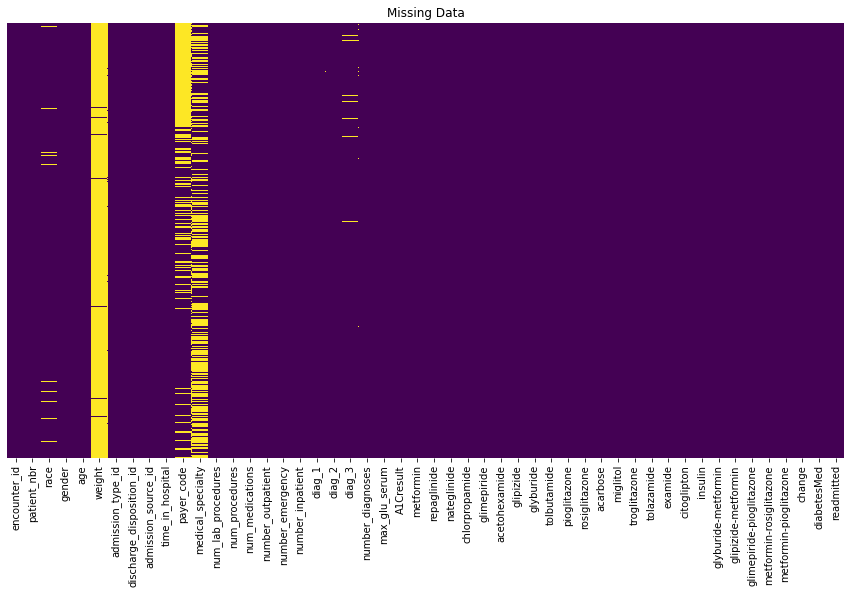

In [13]:
# Visualizing missing data 
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

Text(0.5, 1.0, 'NaN Data')

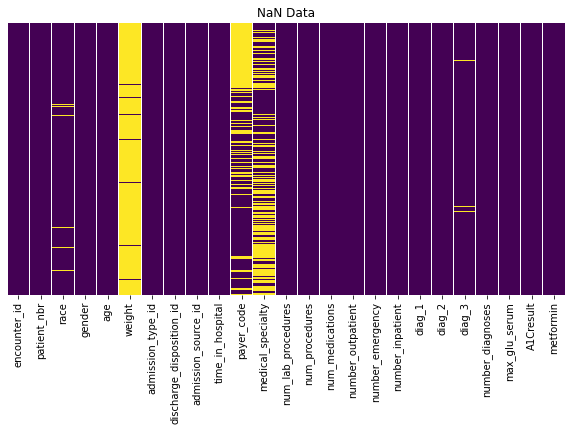

In [14]:
#visualize missing data in the first few columns 
plt.figure(figsize=(10,5))
sns.heatmap(df.iloc[:, :-25].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('NaN Data')

Important columns:




*  patient_nbr                     
* gender                          
* age                             
* admission_type_id               
* discharge_disposition_id        
* time_in_hospital                
* num_medications                 
* number_emergency                
* number_diagnoses                
* change                          
* diabetesMed.



 
  



In [15]:
df["age"].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


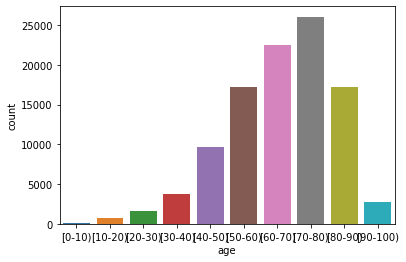

In [16]:
sns.countplot(df['age'])
#the plot shows that the dataset contains more info on older adults and seniors than other ages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


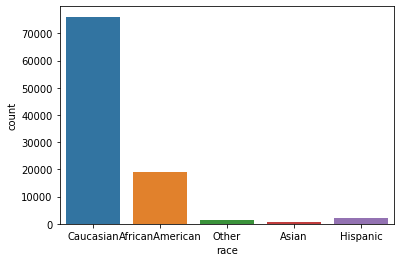

In [17]:
sns.countplot(df['race'])
#we can see that most people in this dataset are caucasian, with low representaion of other groups

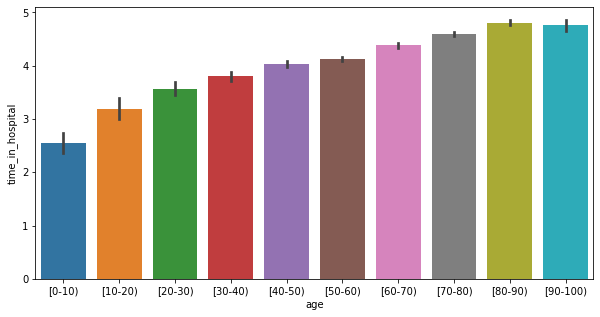

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='time_in_hospital',data=df)
#The older a patient is, the longer they spend in the hospital

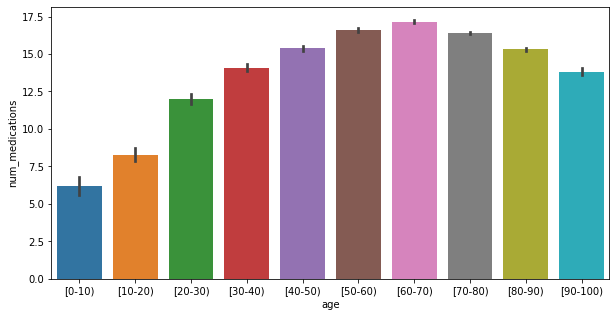

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='num_medications',data=df)
#age seems to have a correlation to amount of meds, a heatmap would show it better

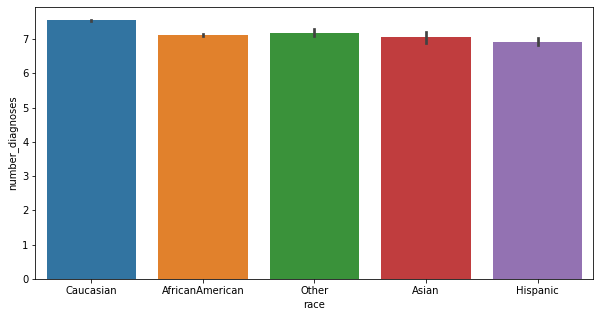

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='race',y='number_diagnoses',data=df)
#Although the data is flawed due to missing info of other races, caucasians seem to have slightly more diagnoses of their condition than other groups

In [21]:
df.head(5) #Remaining Columns

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [22]:
#drop unnecessary columns (petvy)
df.drop(['encounter_id','weight','admission_type_id','discharge_disposition_id', 'time_in_hospital','payer_code','medical_specialty',
                     'number_inpatient','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','admission_source_id','num_lab_procedures','num_procedures',
                     'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','max_glu_serum','A1Cresult',
                     'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','diag_1','diag_2','diag_3',
                     'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True) 





In [23]:
#also drop duplicate data (rabiul)
df.drop_duplicates(subset='patient_nbr', inplace=True)

# **DATA SCALING** 
Rabiul: We have to scaled/genaralized all columns so they fit in a same scale. 

In [24]:
#We need to see which unique attributes to replace
print(df["age"].unique())
print(df["race"].unique())
print(df["gender"].unique())
print(df["readmitted"].unique())
print(df["insulin"].unique())
print(df["diabetesMed"].unique())
print(df["change"].unique())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
['Female' 'Male' 'Unknown/Invalid']
['NO' '>30' '<30']
['No' 'Up' 'Steady' 'Down']
['No' 'Yes']
['No' 'Ch']


In [28]:
#Rabiul/ Nafeeur 
df.race.replace({'Caucasian':1,'AfricanAmerican':2, 'Hispanic':3, 'Asian':4,'Other':5, np.nan:0},inplace=True)
df.gender.replace({'Female': 1, 'Male': 0}, inplace=True)
df.readmitted.replace({'NO': 0, '>30': 0, '<30': 1}, inplace=True)
df.age.replace({ '[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}, inplace=True)
df.insulin.replace({'No':0,'Up':1,'Steady':2,'Down':3},inplace=True) 
df.diabetesMed.replace({'No':0,'Yes':1},inplace=True)
df.change.replace({'No':0,'Ch':1},inplace=True)

TypeError: ignored

In [30]:
#Drop unknown gender, as there are only 3 of them
print(df[df['gender'] == 'Unknown/Invalid'])

       patient_nbr  race           gender  ...  change  diabetesMed  readmitted
30506    100695042     5  Unknown/Invalid  ...       1            1           0
75551     60524946     0  Unknown/Invalid  ...       0            0           0
82573     78119847     0  Unknown/Invalid  ...       1            1           0

[3 rows x 12 columns]


In [31]:
df = df[df['gender'] != 'Unknown/Invalid'].reset_index(drop=True)

In [33]:
#show new data frame after dropping unnecessary values 
df 

,patient_nbr,race,gender,age,num_medications,number_outpatient,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,8222157,1,0,0,1,0,0,1,0,0,0,0
1,55629189,1,0,0,18,0,0,9,1,1,1,0
2,86047875,2,0,0,13,2,0,6,0,0,1,0
3,82442376,1,1,1,16,0,0,7,1,1,1,0
4,42519267,1,1,1,8,0,0,5,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71510,183087545,1,0,2,33,0,0,9,2,1,1,0
71511,188574944,5,0,1,26,0,1,9,1,1,1,0
71512,140199494,5,0,2,17,1,1,9,2,0,1,0
71513,120975314,1,0,2,22,0,1,9,1,1,1,0


# **DATA VISUALIZATION AFTER SCALING**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


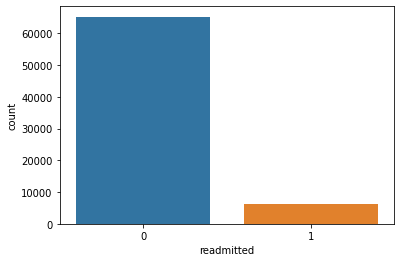

In [34]:
sns.countplot(df['readmitted'])

# **TRAINING THE DATA**

Readmitted is our target data and all other columns is our feature data, so we have to make a train model based on the feature we have and answer the question: does the given patient have
to be readmitted in 30 days?

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(df.drop('readmitted', axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('readmitted',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
y = df['readmitted']
x = df.drop('readmitted', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111375235964483


In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.83192337271901


In [41]:
#testing how big of a factor race, gender, and age play on 
y = df['readmitted']
x = df[["race", "gender","age"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test, predict))

Accuracy for KNN: 0.9119765084248059
Accuracy for Decision Tree: 0.9158218555547787


# **EXTRA TESTING**
logisitic regression, encountered error

In [42]:
#Petvy 
#I'm gonna try using LogisticRegression
from sklearn.model_selection import train_test_split 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [44]:
#import logistic regression 
lr=LogisticRegression()

In [45]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#predict 
predict = lr.predict(x_test)

***TESTING***
-see how the logistic regression model performs

In [47]:
#print confusion matrix 
from sklearn.metrics import confusion_matrix 
pd.DataFrame(confusion_matrix(y_test, predict), columns=['Predicted No', 'Predicted Yes'], 
             index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,21575,0
Actual Yes,2025,0


In [ ]:
#from above table, the model predicted that 
#21575 don't have to be readmitted and 21575 actually didn't have to be readmitted 
#0 have to be readmitted but actually no one got readmitted
#2025 don't have to be readmitted but 2025 actually have been readmitted 
#0 have to be readmitted and actually 0 people actually got readmitted 

In [50]:
#import classification report 
from sklearn.metrics import classification_import 
print(classification_report(y_test, predict))

ImportError: ignored

## Conclusion


First, our group had to load dataset from website. There were a total of 53 columns so we had to figure out which columns we should keep and drop. We decided that it's best to drop columns that were mostly null such as the weight column. There were patient number and encounter number which we think encounter number was kind of redundant so we also dropped that. 

After dropping unnecessary columns, we had to convert the non-numerical values to values. An example would be converting female to 0 and male to 1 and we do that for other columns such as race and insulin columns. After doing that, we had to import sklearn for standard scaler, use test_train_split to train the data and see how accurate the data is. 

We found out that the accuracy for KNN is around 91.20% and the accuracy for Decision Tree 91.58% which is a pretty high precision for the machine model. 

Based on the code that Professor sent in class, they found out that LogisticRegression is the more accurate machine leaarning model so I tried it but I'm encountering an error that I can't import sk.learn metrics and the classification report. 

In conclusion, using DecisionTree will give more accurate results when predicting what patients get readmitted or not. Caucasian, people who are older, and people who took more medications tend to get readmitted more. However, this might be due to a flaw in the data since it has more data values for caucasians and older people. 